## Conformal Prediction Analysis

### Regression Files:

For regression, the following options are allowed:
   - :std results in the same region size for all predictions
   - :normalized means that each region size is dependent on the spread of predictions among the individual trees.
   - :default is the same as :normalized

In [179]:
using RandomForest,PyPlot, DataFrames

#Run experiment
results=experiment(files=["regression/concreate.txt"],methods = [forest( conformal = :normalized),forest( conformal = :std)])

#Format data
r1=results[1][3]["results"][1]["predictions"]
r2=results[1][3]["results"][2]["predictions"]


len=length(r1)
predValues1=zeros(len)
conf1=zeros(Array(Float64,len,2))
conf2=zeros(Array(Float64,len,2))

for i=1:len
    predValues1[i]=r1[i][1]
    conf1[i,1],conf1[i,2]=r1[i][1]-r1[i][2][1],r1[i][2][2]-r1[i][1]
    conf2[i,1],conf2[i,2]=r1[i][1]-r2[i][2][1],r2[i][2][2]-r1[i][1]
end

#Prepare actual data
x=readtable("regression/concreate.txt")[1]
y=predValues1;

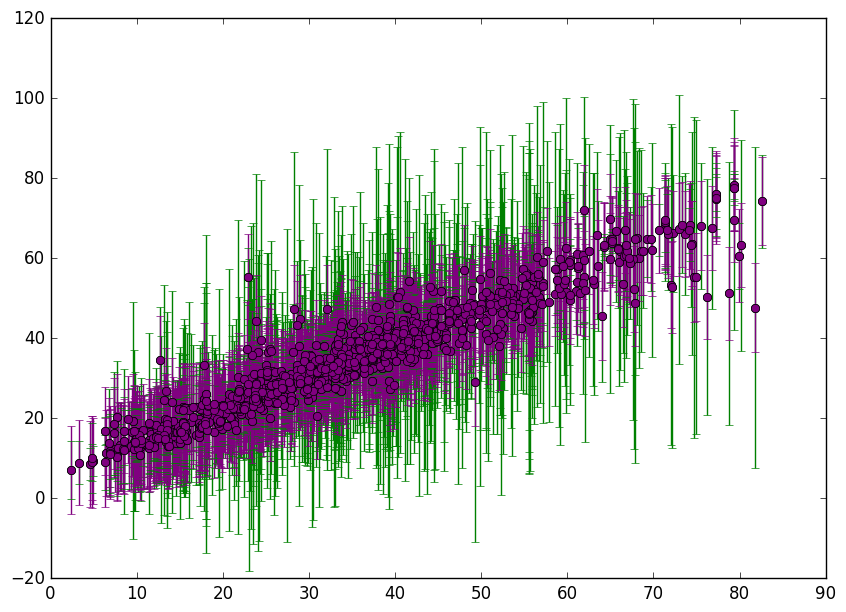

(PyObject <matplotlib.lines.Line2D object at 0x7f8067f0b9d0>,(PyObject <matplotlib.lines.Line2D object at 0x7f8067f0b550>,PyObject <matplotlib.lines.Line2D object at 0x7f8067f0b610>),(PyObject <matplotlib.collections.LineCollection object at 0x7f8067f9a290>,))

In [185]:
fig = figure(figsize=(10,7))
errorbar(x,y,yerr=transpose(conf1), fmt="o",color="green") #:normalized
errorbar(x,y,yerr=transpose(conf2), fmt="o",color="purple") #:std



----------------------------------

In [191]:
using RandomForest,PyPlot, DataFrames

#Run experiment
results=experiment(files=["regression/laser.txt"],methods = [forest( conformal = :normalized),forest( conformal = :std)])

#Format data
r1=results[1][3]["results"][1]["predictions"]
r2=results[1][3]["results"][2]["predictions"]

len=length(r1)
predValues1=zeros(len)
conf1=zeros(Array(Float64,len,2))
conf2=zeros(Array(Float64,len,2))

for i=1:len
    predValues1[i]=r1[i][1]
    conf1[i,1],conf1[i,2]=r1[i][1]-r1[i][2][1],r1[i][2][2]-r1[i][1]
    conf2[i,1],conf2[i,2]=r1[i][1]-r2[i][2][1],r2[i][2][2]-r1[i][1]
end

#Prepare actual data
x=readtable("regression/laser.txt")[1]
y=predValues1;

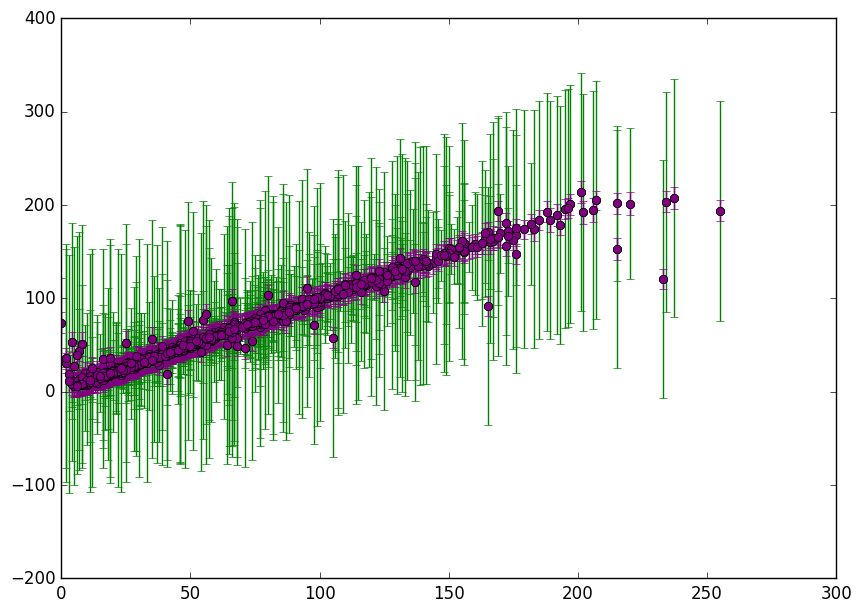

(PyObject <matplotlib.lines.Line2D object at 0x7f8067c53e90>,(PyObject <matplotlib.lines.Line2D object at 0x7f8067c53a10>,PyObject <matplotlib.lines.Line2D object at 0x7f8067c53ad0>),(PyObject <matplotlib.collections.LineCollection object at 0x7f8067f9cd50>,))

In [192]:
fig = figure(figsize=(10,7))
errorbar(x,y,yerr=transpose(conf1), fmt="o",color="green") #:normalized
errorbar(x,y,yerr=transpose(conf2), fmt="o",color="purple") #:std